In [101]:
from paddlex.cls import transforms
import paddlex as pdx
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import paddlex


In [93]:
# 训练机器学习时，自行修改概率，做数据增强

img_gaussian_blur = iaa.Sometimes(1, [iaa.blur.GaussianBlur(sigma=(0.3, 3.0))])
img_weather = iaa.Sometimes(1, [iaa.Clouds()])
img_edge = iaa.Canny()
img_flip = iaa.Fliplr(1.0)

In [105]:
def trans(file_path, transformer,asint=False):
    train_transforms = transforms.Compose([transformer,])
    origin_image = cv2.imread(file_path)
    transformed_ndarray = train_transforms(origin_image)[0]
    if asint: transformed_ndarray = transformed_ndarray.astype(np.int)
    return origin_image, transformed_ndarray

def image_show(origin, transformed):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(origin_image)
    plt.subplot(1, 2, 2)
    plt.imshow(transformed)
    plt.show()

In [95]:
origin, transformed_blur = trans('images/1.png', img_gaussian_blur)
origin, transformed_weather = trans('images/1.png', img_weather)
origin, transformed_edge = trans('images/1.png', img_edge)
origin, transformed_flip = trans('images/1.png', img_flip)

/home/jeffye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


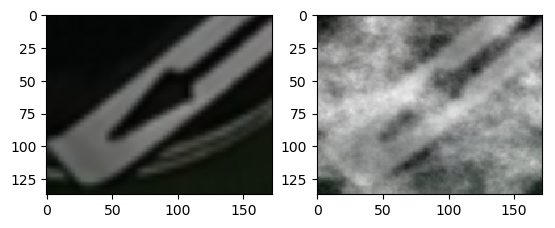

In [96]:
image_show(origin, transformed_weather)

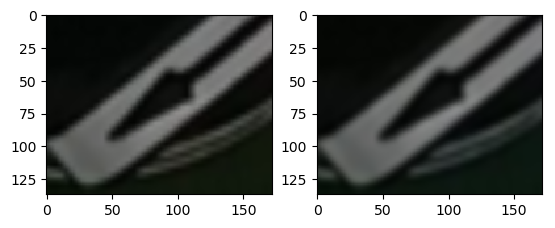

In [97]:
image_show(origin, transformed_blur)

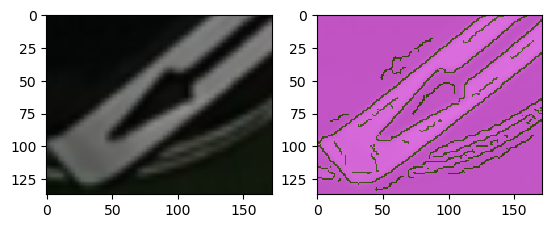

In [98]:
image_show(origin, transformed_edge)

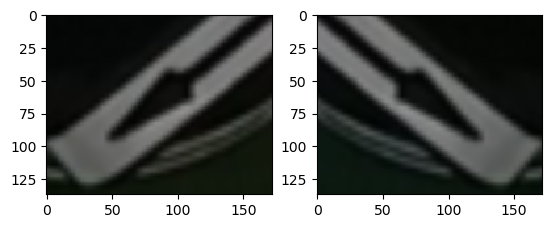

In [99]:
image_show(origin, transformed_flip)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


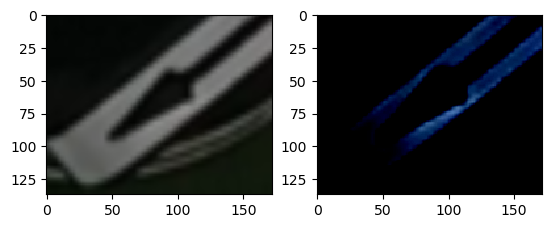

In [106]:
img_norm = paddlex.cls.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], min_val=[0, 0, 0], max_val=[255.0, 255.0, 255.0])

origin, transformed_norm = trans('images/1.png', img_norm, asint=False)
image_show(origin, transformed_norm)

/home/jeffye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


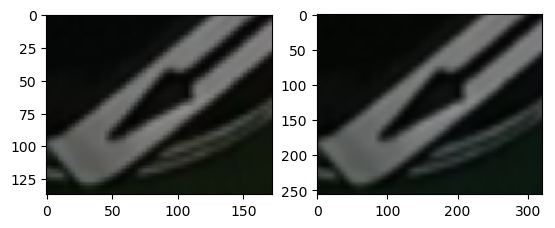

In [112]:
img_resize = paddlex.cls.transforms.ResizeByShort(short_size=256, max_size=-1)
origin, transformed_norm = trans('images/1.png', img_resize, asint=True)
image_show(origin, transformed_norm)

/home/jeffye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


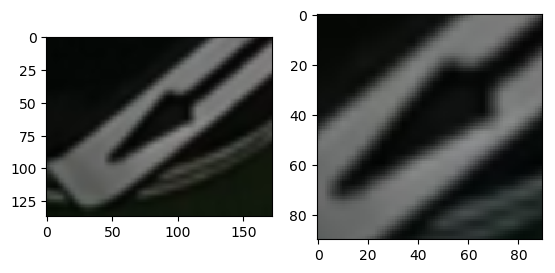

In [134]:
img_tran = paddlex.cls.transforms.CenterCrop(crop_size=90)
origin, transformed_norm = trans('images/1.png', img_tran, asint=True)
image_show(origin, transformed_norm)